# E‑Commerce Shipping Data Analysis (Final Project)

**Author:** _<Your Name Here>_  
**Date:** _<Auto/Today>_

This notebook performs end-to-end data analysis on an E‑Commerce Shipping dataset (`Train.csv`) including:
- Data loading and initial overview
- Data preprocessing (cleaning, type fixes, feature engineering)
- Exploratory Data Analysis (EDA)
- 10+ visualizations using Matplotlib/Seaborn
- Insights and recommendations

**Original Dataset Source:** Kaggle – *E-Commerce Shipping Data* (Prachi Gupta).  
(Download from Kaggle and extract `Train.csv` locally before running this notebook.)


## 1) Setup & Imports

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)
sns.set(style='whitegrid')  # visualization style

# For nicer plots inline
%matplotlib inline

## 2) Data Loading & Initial Overview

In [2]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# IMPORTANT: Update FILE_PATH to the location of your Train.csv on your machine
# Example: r"C:\\Users\\aagin\\Downloads\\archive (1)\\Train.csv"
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

FILE_PATH = r"C:\Users\aagin\Downloads\archive (1)\Train.csv"  # <-- EDIT THIS PATH IF NEEDED

# Load dataset
df = pd.read_csv(FILE_PATH)

# Basic overview
print("Shape (rows, cols):", df.shape)
display(df.head())
print("\nInfo:")
display(df.info())
print("\nDescribe (numeric):")
display(df.describe())
print("\nMissing values per column:")
display(df.isnull().sum())


Shape (rows, cols): (10999, 12)


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


None


Describe (numeric):


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000



Missing values per column:


ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

### Initial Observations
- The dataset includes columns such as `Warehouse_block`, `Mode_of_Shipment`, `Customer_care_calls`, `Customer_rating`, `Cost_of_the_Product`, `Prior_purchases`, `Product_importance`, `Gender`, `Discount_offered`, `Weight_in_gms`, and `Reached.on.Time_Y.N`.
- We'll verify duplicates, ensure data types are correct, and create useful derived columns for richer analysis.
- Note: In this dataset, `Reached.on.Time_Y.N` is typically encoded as **1 = Late Delivery** and **0 = On Time**.


## 3) Data Pre‑processing

In [3]:
# --- 3.1 Handle Duplicates ---
dup_count = df.duplicated().sum()
print(f"Duplicate rows found: {dup_count}")
if dup_count > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Duplicates removed.")
else:
    print("No duplicate rows.")

# --- 3.2 Correct Data Types (if needed) ---
# (All columns are typically proper types; enforce numerics where appropriate)
numeric_cols = ['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases',
                'Discount_offered','Weight_in_gms']
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# --- 3.3 Create Derived Columns ---
# Map delivery status for readability
# Convention: 1 = Late, 0 = On time (per dataset description)
df['Is_Late'] = df['Reached.on.Time_Y.N'].map({1:1, 0:0})
df['Is_On_Time'] = 1 - df['Is_Late']

# Effective price after discount (assuming Discount_offered is a percent)
df['Cost_After_Discount'] = df['Cost_of_the_Product'] * (1 - df['Discount_offered'] / 100.0)

# Weight in kilograms
df['Weight_kg'] = df['Weight_in_gms'] / 1000.0

# Bins for discount (categorical)
df['Discount_Bin'] = pd.cut(df['Discount_offered'],
                            bins=[-1, 0, 10, 20, 30, 50, np.inf],
                            labels=['0', '1-10', '11-20', '21-30', '31-50', '50+'])

# Bins for product cost
df['Cost_Bin'] = pd.cut(df['Cost_of_the_Product'], bins=5)

# Care calls grouping
df['CareCalls_Bin'] = pd.cut(df['Customer_care_calls'], bins=[-1,1,3,5,7, np.inf],
                             labels=['0-1','2-3','4-5','6-7','8+'])

print("\nAfter feature engineering, columns are:\n", df.columns.tolist())
print("\nPreview:") 
display(df.head())

# --- 3.4 Optional Filtering/Aggregation (example) ---
# Keep a working copy for EDA
eda_df = df.copy()


Duplicate rows found: 0
No duplicate rows.

After feature engineering, columns are:
 ['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N', 'Is_Late', 'Is_On_Time', 'Cost_After_Discount', 'Weight_kg', 'Discount_Bin', 'Cost_Bin', 'CareCalls_Bin']

Preview:


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Is_Late,Is_On_Time,Cost_After_Discount,Weight_kg,Discount_Bin,Cost_Bin,CareCalls_Bin
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,1,0,99.12,1.233,31-50,"(138.8, 181.6]",4-5
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,1,0,88.56,3.088,50+,"(181.6, 224.4]",4-5
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,1,0,95.16,3.374,31-50,"(181.6, 224.4]",2-3
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,1,0,158.40,1.177,1-10,"(138.8, 181.6]",2-3
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,1,0,99.36,2.484,31-50,"(181.6, 224.4]",2-3


## 4) Exploratory Data Analysis (EDA)

### 4.1 Univariate Analysis

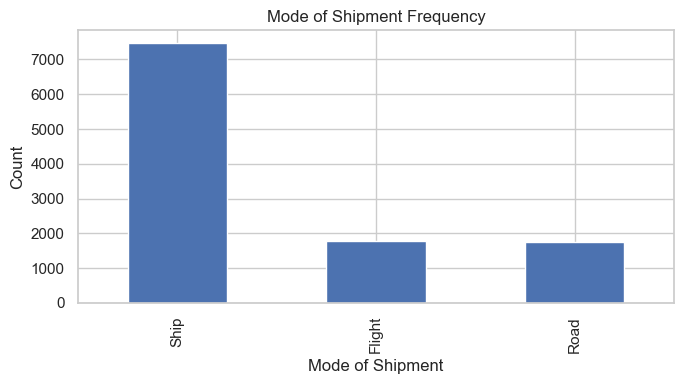

In [4]:
# Plot 1: Mode of Shipment frequency
plt.figure(figsize=(7,4))
eda_df['Mode_of_Shipment'].value_counts().plot(kind='bar')
plt.title('Mode of Shipment Frequency')
plt.xlabel('Mode of Shipment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


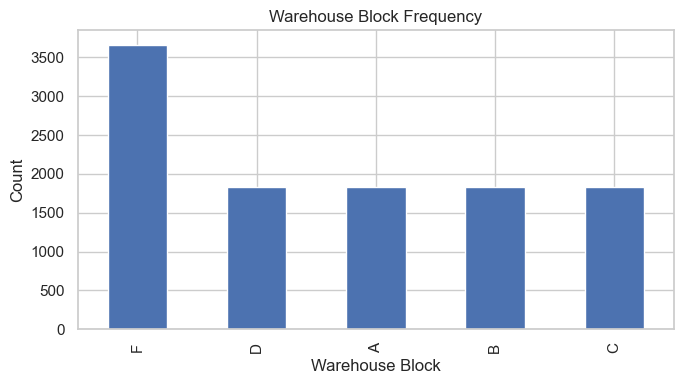

In [5]:
# Plot 2: Warehouse block frequency
plt.figure(figsize=(7,4))
eda_df['Warehouse_block'].value_counts().plot(kind='bar')
plt.title('Warehouse Block Frequency')
plt.xlabel('Warehouse Block')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


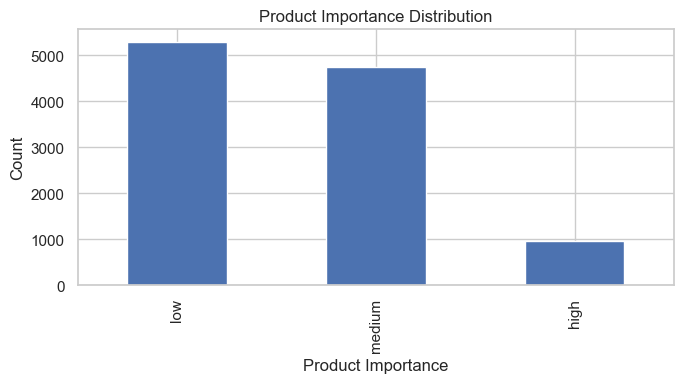

In [6]:
# Plot 3: Product importance distribution
plt.figure(figsize=(7,4))
eda_df['Product_importance'].value_counts().plot(kind='bar')
plt.title('Product Importance Distribution')
plt.xlabel('Product Importance')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


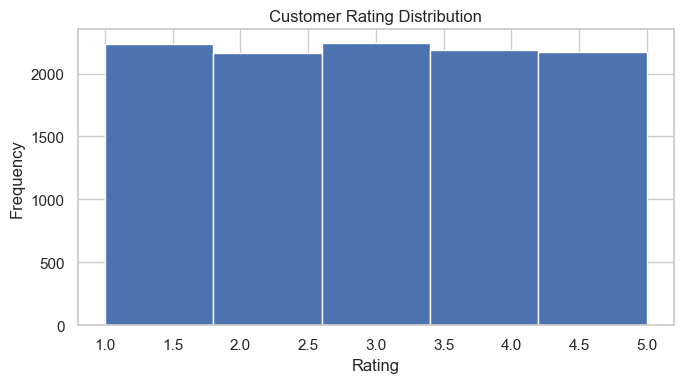

In [7]:
# Plot 4: Customer rating distribution
plt.figure(figsize=(7,4))
plt.hist(eda_df['Customer_rating'], bins=5)
plt.title('Customer Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


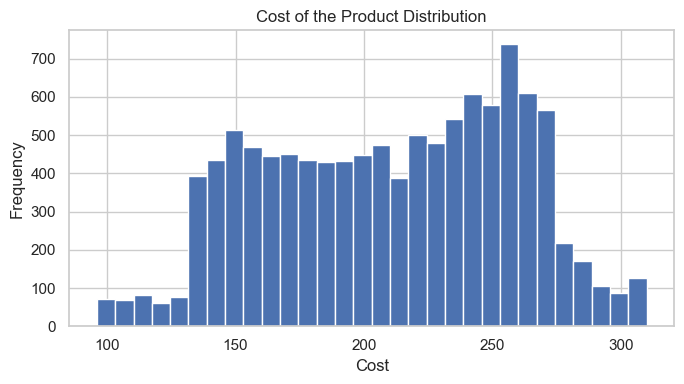

In [8]:
# Plot 5: Cost of the Product distribution
plt.figure(figsize=(7,4))
plt.hist(eda_df['Cost_of_the_Product'], bins=30)
plt.title('Cost of the Product Distribution')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


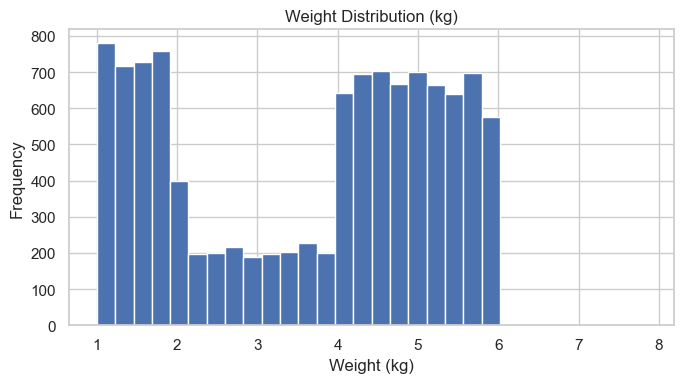

In [9]:
# Plot 6: Weight distribution (kg)
plt.figure(figsize=(7,4))
plt.hist(eda_df['Weight_kg'], bins=30)
plt.title('Weight Distribution (kg)')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### 4.2 Bivariate Analysis

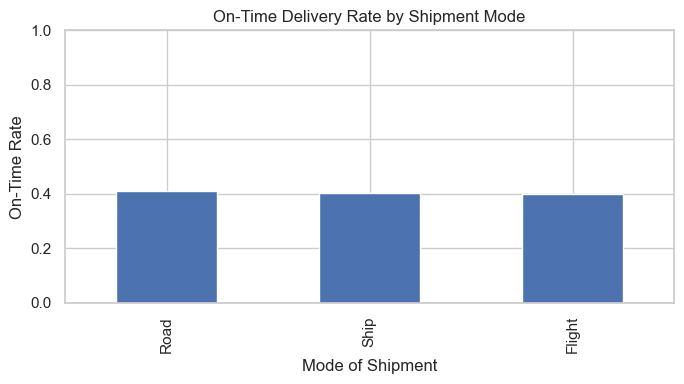

In [10]:
# Plot 7: On-time rate by Mode of Shipment
on_time_by_mode = eda_df.groupby('Mode_of_Shipment')['Is_On_Time'].mean().sort_values(ascending=False)
plt.figure(figsize=(7,4))
on_time_by_mode.plot(kind='bar')
plt.title('On-Time Delivery Rate by Shipment Mode')
plt.xlabel('Mode of Shipment')
plt.ylabel('On-Time Rate')
plt.ylim(0,1)
plt.tight_layout()
plt.show()


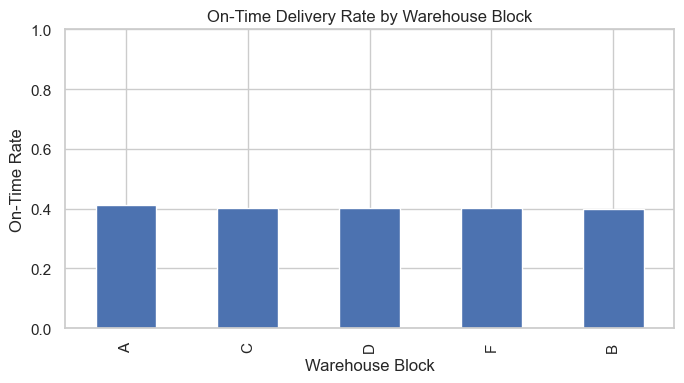

In [11]:
# Plot 8: On-time rate by Warehouse block
on_time_by_wh = eda_df.groupby('Warehouse_block')['Is_On_Time'].mean().sort_values(ascending=False)
plt.figure(figsize=(7,4))
on_time_by_wh.plot(kind='bar')
plt.title('On-Time Delivery Rate by Warehouse Block')
plt.xlabel('Warehouse Block')
plt.ylabel('On-Time Rate')
plt.ylim(0,1)
plt.tight_layout()
plt.show()


<Figure size 700x400 with 0 Axes>

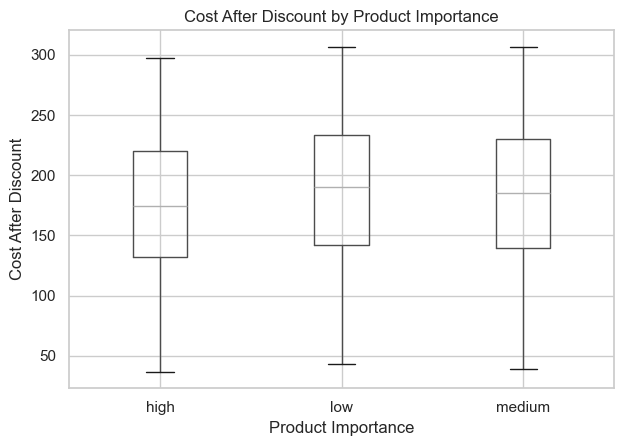

In [12]:
# Plot 9: Boxplot - Cost after discount by Product Importance
plt.figure(figsize=(7,4))
eda_df.boxplot(column='Cost_After_Discount', by='Product_importance')
plt.title('Cost After Discount by Product Importance')
plt.suptitle('')
plt.xlabel('Product Importance')
plt.ylabel('Cost After Discount')
plt.tight_layout()
plt.show()


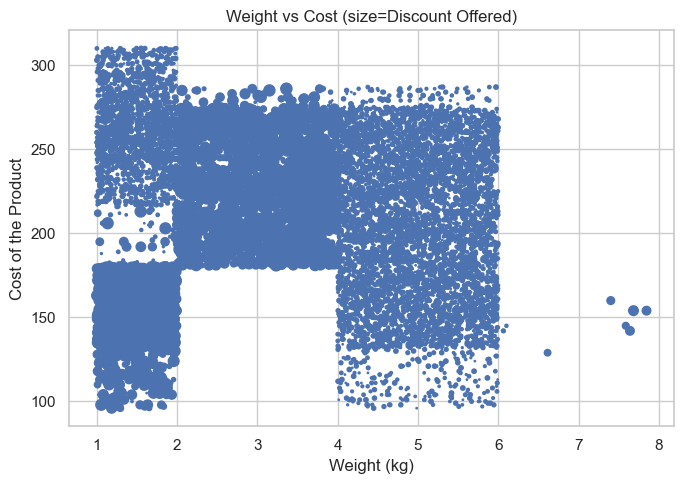

In [13]:
# Plot 10: Scatter - Weight vs Cost (marker size by discount)
plt.figure(figsize=(7,5))
plt.scatter(eda_df['Weight_kg'], eda_df['Cost_of_the_Product'], s=eda_df['Discount_offered'])
plt.title('Weight vs Cost (size=Discount Offered)')
plt.xlabel('Weight (kg)')
plt.ylabel('Cost of the Product')
plt.tight_layout()
plt.show()


### 4.3 Multivariate Analysis & Correlation

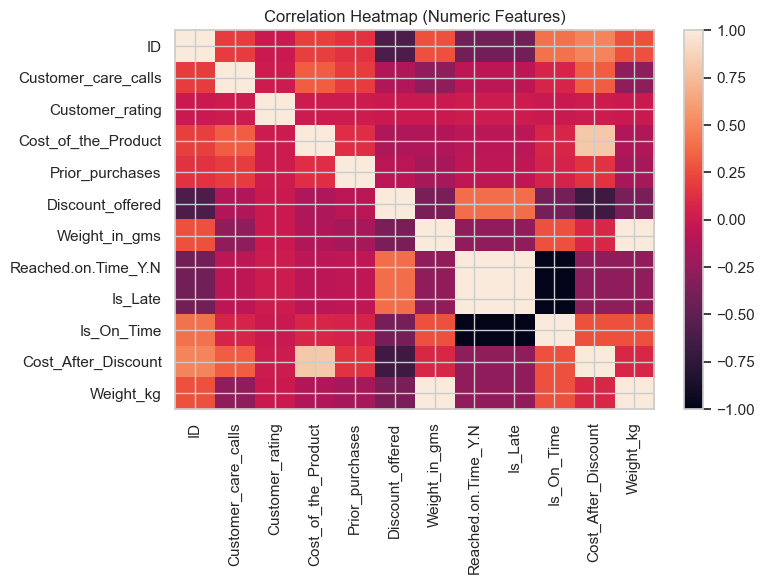

In [14]:
# Plot 11: Correlation heatmap for numeric variables
numeric_cols = eda_df.select_dtypes(include=[np.number]).columns
corr = eda_df[numeric_cols].corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.title('Correlation Heatmap (Numeric Features)')
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.tight_layout()
plt.show()


In [15]:
# Pivot example: Warehouse x Mode vs On-Time rate
pivot_table = pd.pivot_table(
    eda_df,
    values='Is_On_Time',
    index='Warehouse_block',
    columns='Mode_of_Shipment',
    aggfunc='mean'
)
print('On-Time Rate by Warehouse and Shipment Mode:')
display(pivot_table.round(3))


On-Time Rate by Warehouse and Shipment Mode:


Mode_of_Shipment,Flight,Road,Ship
Warehouse_block,,,
A,0.414,0.429,0.410
B,0.402,0.415,0.393
C,0.376,0.425,0.404
D,0.401,0.404,0.402
F,0.399,0.399,0.403


### 4.4 Statistical Summaries

In [16]:
summary = {
    'overall_on_time_rate': eda_df['Is_On_Time'].mean(),
    'avg_cost': eda_df['Cost_of_the_Product'].mean(),
    'avg_discount': eda_df['Discount_offered'].mean(),
    'avg_weight_kg': eda_df['Weight_kg'].mean(),
    'avg_care_calls': eda_df['Customer_care_calls'].mean()
}
for k, v in summary.items():
    print(f"{k}: {v:.3f}")

print('\nOn-time rate by Product Importance:')
display(eda_df.groupby('Product_importance')['Is_On_Time'].mean().sort_values(ascending=False).round(3))

print('\nOn-time rate by Discount Bin:')
display(eda_df.groupby('Discount_Bin')['Is_On_Time'].mean().sort_values(ascending=False).round(3))


overall_on_time_rate: 0.403
avg_cost: 210.197
avg_discount: 13.373
avg_weight_kg: 3.634
avg_care_calls: 4.054

On-time rate by Product Importance:


Product_importance
medium    0.410
low       0.407
high      0.350
Name: Is_On_Time, dtype: float64


On-time rate by Discount Bin:


C:\Users\aagin\AppData\Local\Temp\ipykernel_2780\714619364.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(eda_df.groupby('Discount_Bin')['Is_On_Time'].mean().sort_values(ascending=False).round(3))


Discount_Bin
1-10     0.531
11-20    0.000
21-30    0.000
31-50    0.000
50+      0.000
0          NaN
Name: Is_On_Time, dtype: float64

## 5) Insights & Interpretation

**At least 5 Key Insights (fill with your words, supported by the outputs above):**
1. _Shipment mode performance:_ e.g., Which shipment mode has the **highest on-time rate** and which lags?
2. _Warehouse comparison:_ e.g., Which warehouse block consistently **underperforms/overperforms** for on-time delivery?
3. _Discount impact:_ e.g., Do **higher discounts** correlate with **late deliveries** or lower on-time rates?
4. _Weight & cost dynamics:_ e.g., Heavier items tend to have **different delivery outcomes** or require specific shipping modes.
5. _Customer interaction:_ e.g., More **customer care calls** may signal issues and correlate with late deliveries.
6. _(Optional)_ Product importance: Which importance level shows **better delivery performance**?
7. _(Optional)_ Any anomalies or outliers spotted in cost/weight distributions.

Use the pivot tables, grouped means, and charts to justify each insight with numbers.


## 6) Conclusion & Recommendations

**Summary of Findings**
- Summarize overall on-time rate and the best/worst performers across shipment modes and warehouses.
- Note any strong correlations (positive/negative) among numeric features.

**Recommendations**
- Operational: e.g., prioritize high-performing shipment modes for heavy/expensive products.
- Process: e.g., reduce customer care call drivers by addressing frequent delay causes.
- Further Analysis: collect timestamps, locations, or product subcategories for deeper modeling.

**Reproducibility Notes**
- Replace `FILE_PATH` at the top with your local path to `Train.csv`.
- Run the notebook from top to bottom to regenerate all figures and tables.
